In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto85/auto.csv
/kaggle/input/auto85/auto_clean.csv


In [24]:
# Read the data into a dataframe
df = pd.read_csv("/kaggle/input/auto85/auto.csv")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [25]:
# Find the null values in the data
df.isnull().count()

3              204
?              204
alfa-romero    204
gas            204
std            204
two            204
convertible    204
rwd            204
front          204
88.6           204
168.8          204
64.1           204
48.8           204
2548           204
dohc           204
four           204
130            204
mpfi           204
3.47           204
2.68           204
9.0            204
111            204
5000           204
21             204
27             204
13495          204
dtype: int64

In [26]:
df_clean = pd.read_csv("/kaggle/input/auto85/auto_clean.csv")
df_clean.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [27]:

df.columns = ['symboling', 'normalized_loses', 'make', 'fuel_type', 'aspiration', 
            'Num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
          'wheel_base', 'length', 'width', 'height', 'curb_weight', 
             'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
             'bore', 'stroke', 'compression_ratio', 'horse_power',
             'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df.head()

,symboling,normalized_loses,make,fuel_type,aspiration,Num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [28]:
df.isnull().sum()

symboling            0
normalized_loses     0
make                 0
fuel_type            0
aspiration           0
Num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horse_power          0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [29]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_loses   204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   Num_of_doors       204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_of_cylinders   204 non-null    object 
 16  engine_size        204 non

In [30]:
# Checking for wrong items in columns
for col in df.columns:
    print('{} = {}'.format(col, df[col].unique()))

symboling = [ 3  1  2  0 -1 -2]
normalized_loses = ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type = ['gas' 'diesel']
aspiration = ['std' 'turbo']
Num_of_doors = ['two' 'four' '?']
body_style = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels = ['rwd' 'fwd' '4wd']
engine_location = ['front' 'rear']
wheel_base = [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93

In [31]:
# Replace the special characters with null values
for col in df.columns:
    df[col].replace({'?' : np.nan}, inplace=True)

df.head()    


,symboling,normalized_loses,make,fuel_type,aspiration,Num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [32]:
# Special characters have been converted into null values
# Again calculate the null values in the dataset
df.isnull().sum()

symboling             0
normalized_loses     40
make                  0
fuel_type             0
aspiration            0
Num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horse_power           2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

<AxesSubplot:>

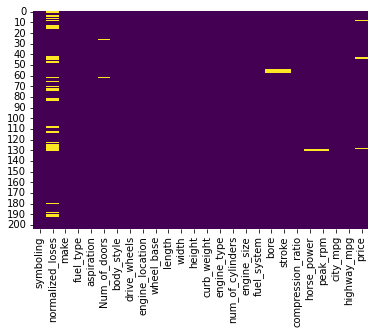

In [33]:
# Visualizing the missing values
import seaborn as sns
%matplotlib inline
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


In [34]:
# Fill the missing values with mean
missing_col = ['normalized_loses', 'bore', 'stroke', 'horse_power', 'peak_rpm', 'price']
for col in missing_col:
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)

df.head()

,symboling,normalized_loses,make,fuel_type,aspiration,Num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [35]:
# Checking the correlation between the variables
%matplotlib inline
import matplotlib.pyplot as plt


<AxesSubplot:>

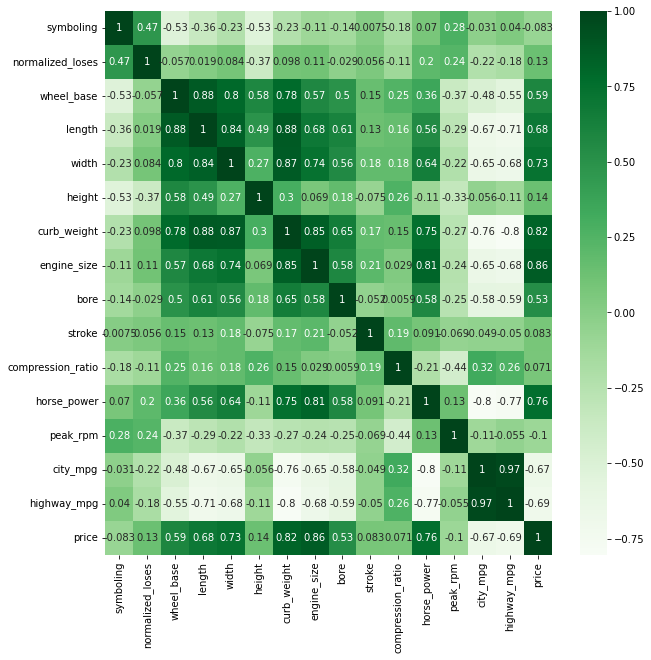

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Greens')

-> Here we can see that price was affected by wheel_base, length, width, curb_weight, horse_power and engine_size. 
-> let's check how horse_power will affect the price

Text(0, 0.5, 'Price')

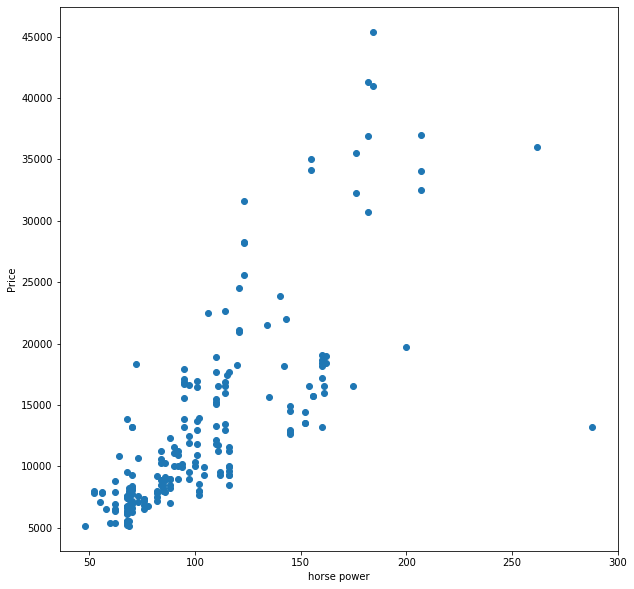

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(x='horse_power', y='price', data=df)
plt.xlabel("horse power")
plt.ylabel("Price")

Most of the horse power values are lies between 50 to 150. And the price values are between 5000 to 25000. Remaining values should be considered as outliers.

Let's see the count of the horse power in between 50 and 150.

<AxesSubplot:xlabel='horse_power', ylabel='Count'>

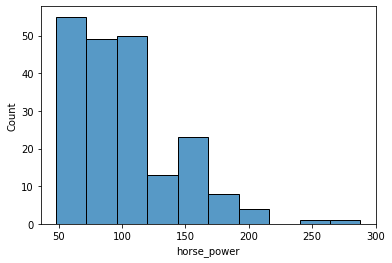

In [38]:

sns.histplot(df.horse_power, bins=10)

Now check the relationship between engine size and price.

Text(0, 0.5, 'Price')

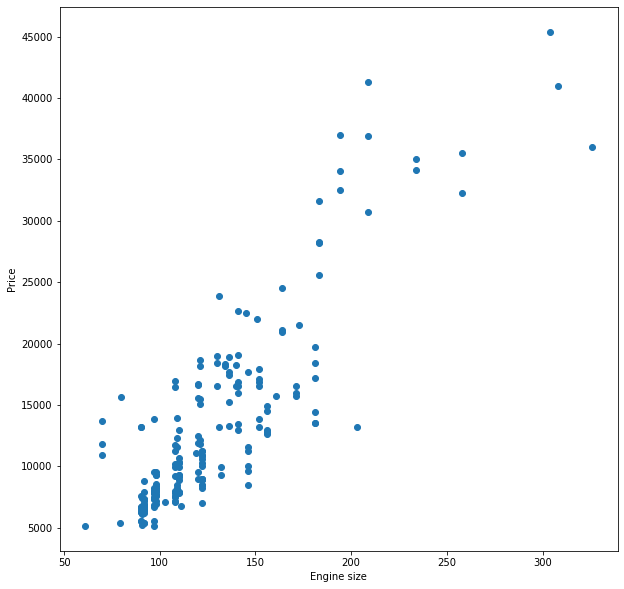

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x='engine_size', y='price', data=df)
plt.xlabel('Engine size')
plt.ylabel('Price')

This pattern is almost same as horse power vs price.

let's check the relationship between highway_mpg and price

Text(0, 0.5, 'Price')

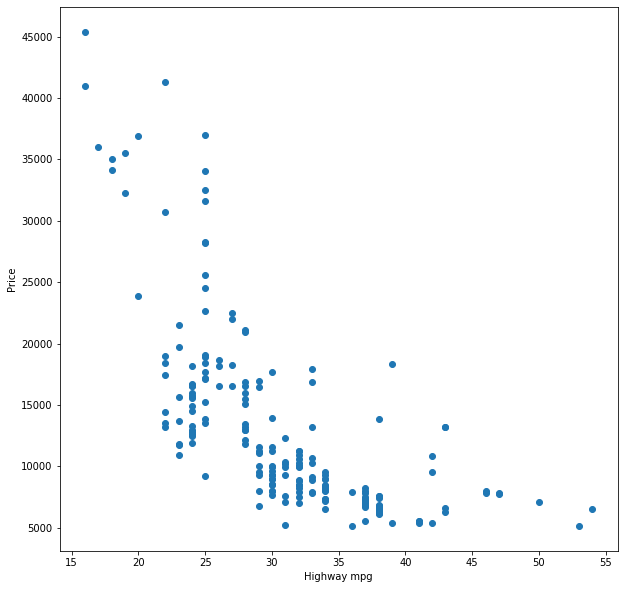

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(x='highway_mpg', y='price', data=df)
plt.xlabel('Highway mpg')
plt.ylabel('Price')

Let us check the number of doors.

In [41]:
df.Num_of_doors.value_counts()

four    114
two      88
Name: Num_of_doors, dtype: int64

**Relationship between doors and price**

<AxesSubplot:xlabel='price', ylabel='Num_of_doors'>

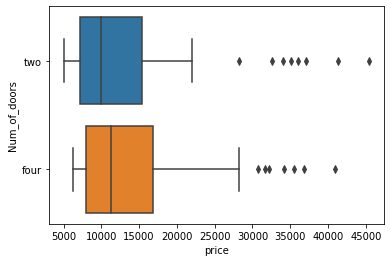

In [42]:
sns.boxplot(x='price', y='Num_of_doors', data=df)